# IMPORTS




In [252]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

# IMPORTANDO DATASET


In [253]:
data = pd.read_csv('Churn.csv',sep=';') #Lendo o dataset e separando as colunas por ';'
data.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# ANÁLISE EXPLORATÓRIA



Faremos uma análise para descobrir o que exatamente vamos tratar no nosso dataset. 
Primeiro iremos dar os nomes às colunas 

In [254]:
data.columns = ['Id','Score','Estado','Genero','Idade','Patrimônio','Saldo','Produtos','PossuiCred','Ativo','Salario','Saiu']
data.head()     


,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


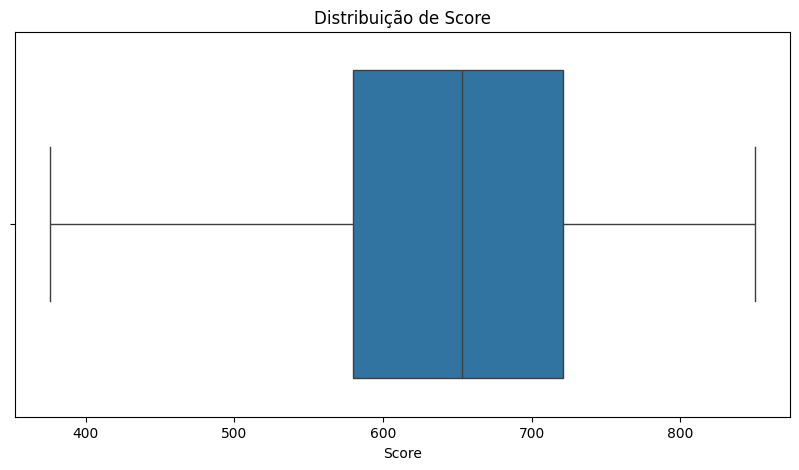

Coluna: Score
Min: 376
Max: 850
Mean: 648.6216216216217
Median: 653.0
Std: 98.26421874897119
Q1: 580.0
Q3: 721.0
IQR: 141.0
Lower Bound: 368.5, Upper Bound: 932.5
Number of Outliers: 0
% de Outliers: 0.00%




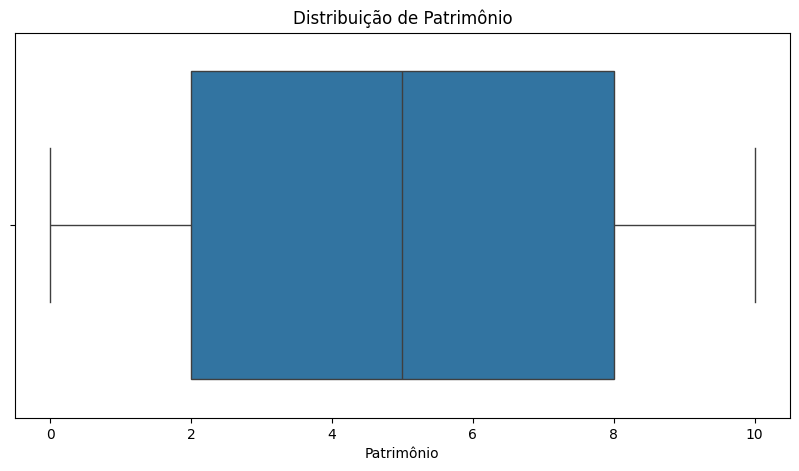

Coluna: Patrimônio
Min: 0
Max: 10
Mean: 5.069069069069069
Median: 5.0
Std: 2.927691409320773
Q1: 2.0
Q3: 8.0
IQR: 6.0
Lower Bound: -7.0, Upper Bound: 17.0
Number of Outliers: 0
% de Outliers: 0.00%




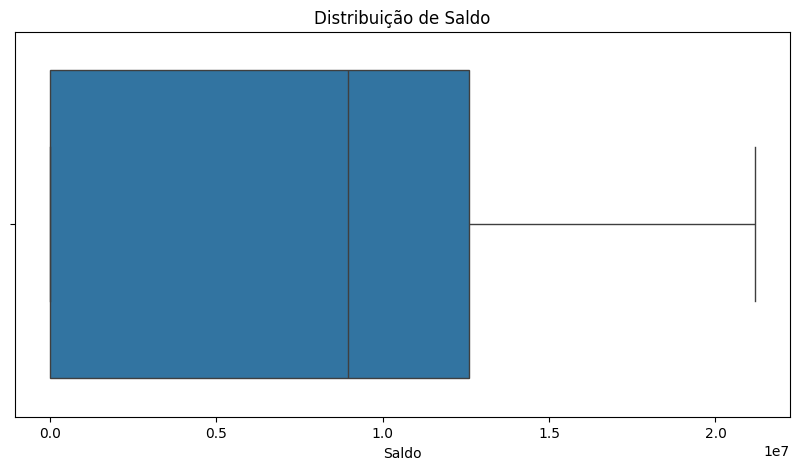

Coluna: Saldo
Min: 0
Max: 21177431
Mean: 7164927.564564564
Median: 8958835.0
Std: 6311840.125836206
Q1: 0.0
Q3: 12586844.0
IQR: 12586844.0
Lower Bound: -18880266.0, Upper Bound: 31467110.0
Number of Outliers: 0
% de Outliers: 0.00%




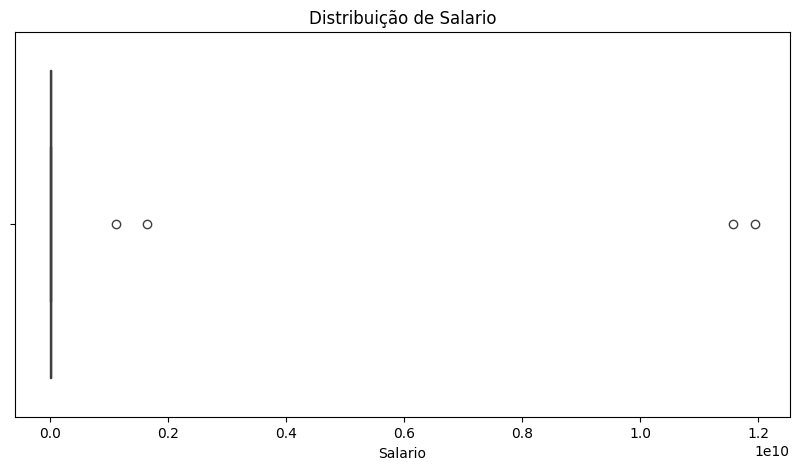

Coluna: Salario
Min: 9677.0
Max: 11934688000.0
Mean: 35287620.25100806
Median: 8703249.5
Std: 530579988.3011111
Q1: 3029011.25
Q3: 14052128.0
IQR: 11023116.75
Lower Bound: -13505663.875, Upper Bound: 30586803.125
Number of Outliers: 4
% de Outliers: 0.40%




In [255]:
# Iremos identificar os outliers de todas as colunas numericas
def plot_distribution_and_outliers(df, column):
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=df[column])
  plt.title(f"Distribuição de {column}")
  plt.show()

  # Identificar outliers usando IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  # Imprimir resultados
  print(f"Coluna: {column}")
  print(f"Min: {df[column].min()}")
  print(f"Max: {df[column].max()}")
  print(f"Mean: {df[column].mean()}")
  print(f"Median: {df[column].median()}")
  print(f"Std: {df[column].std()}")
  print(f"Q1: {Q1}")
  print(f"Q3: {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
  print(f"Number of Outliers: {len(outliers)}")
  print(f"% de Outliers: {len(outliers) / len(df) * 100:.2f}%")
  print("\n")

numeric = ['Score','Patrimônio','Saldo','Salario']

for column in numeric:
  plot_distribution_and_outliers(data, column)

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


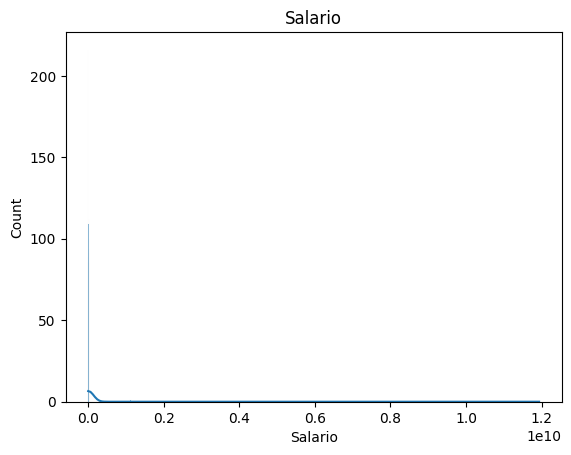

In [256]:
# Como encontramos outliers na coluna de salário, iremos ver mais a fundo para identificar quais são

sns.histplot(data['Salario'], kde=True).set_title('Salario')
desvio = sts.stdev(data['Salario'].dropna())
data.loc[data['Salario'] >= 2 * desvio] # levamos em conta o nosso padrão para esse datset 2 * o desvio padrão dos salarios
# verificamos que existem alguns salarios que estão muito fora do padrão, então vamos retirá-los

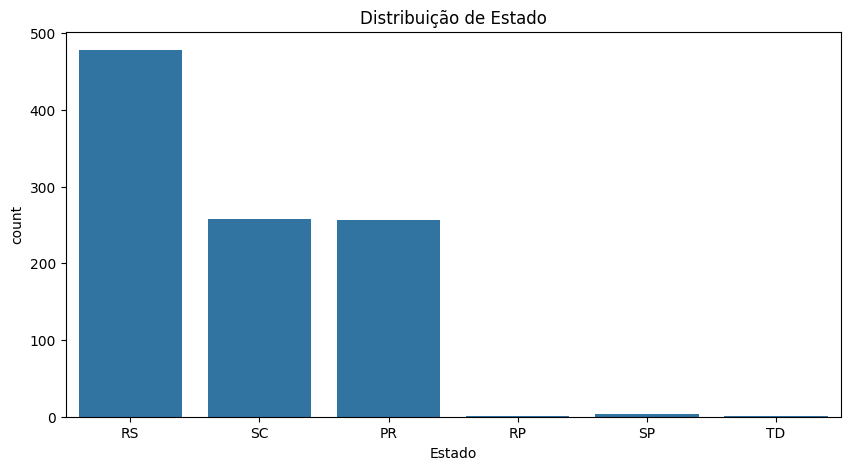

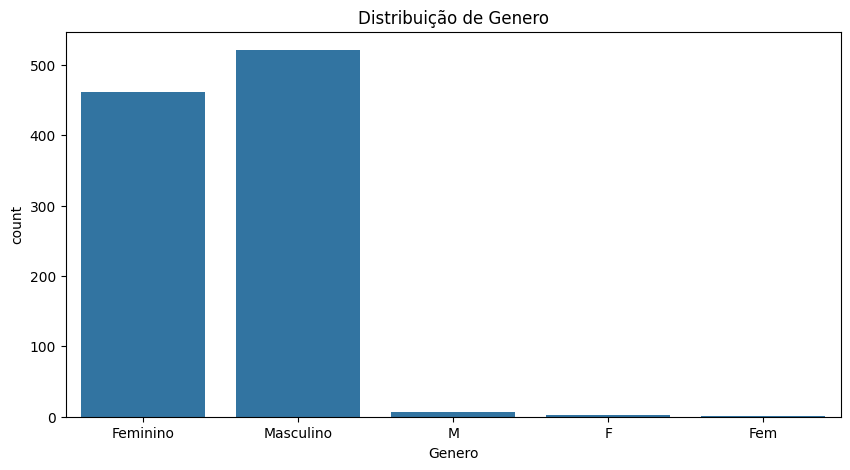

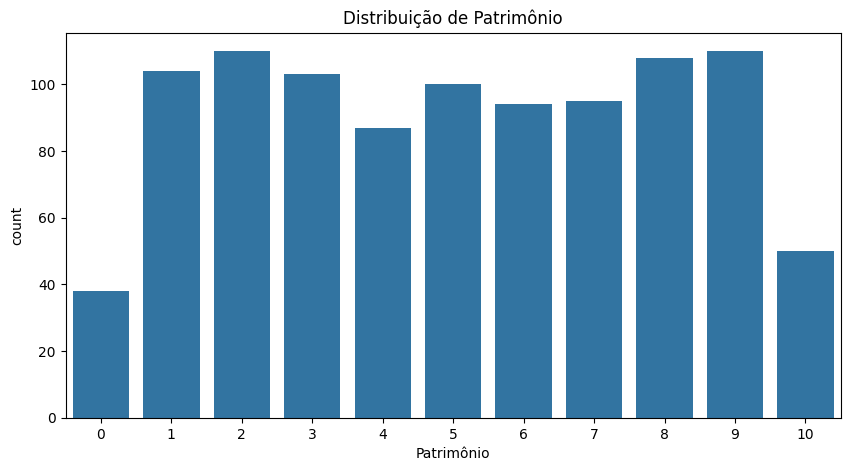

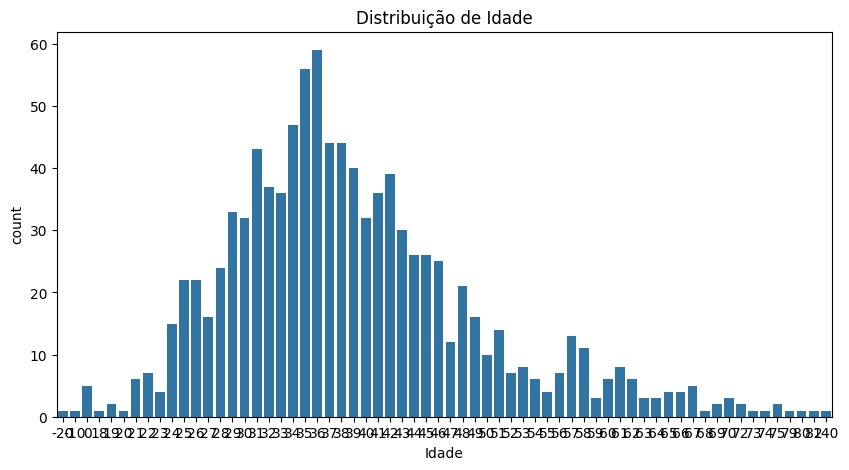

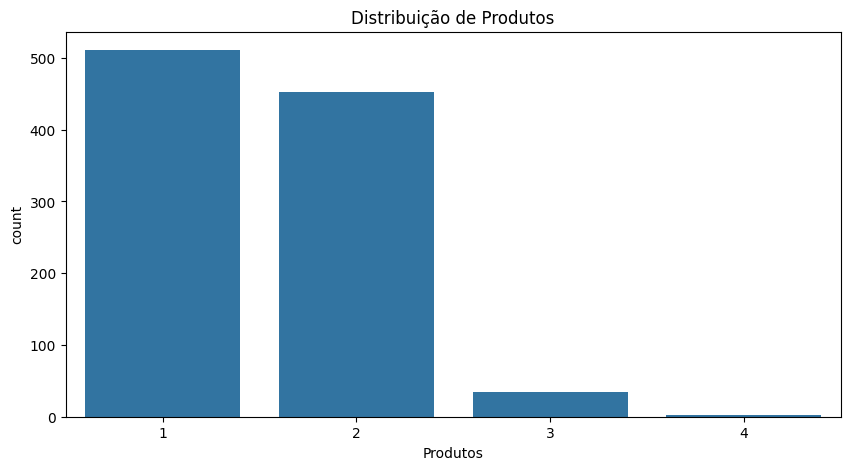

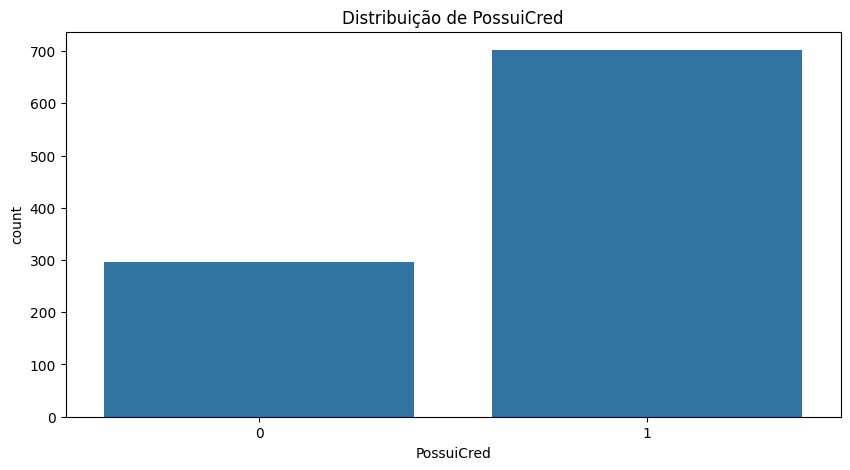

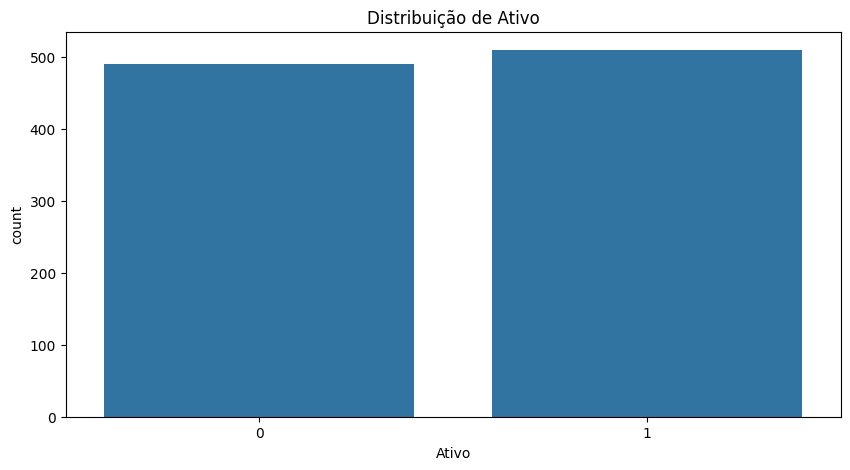

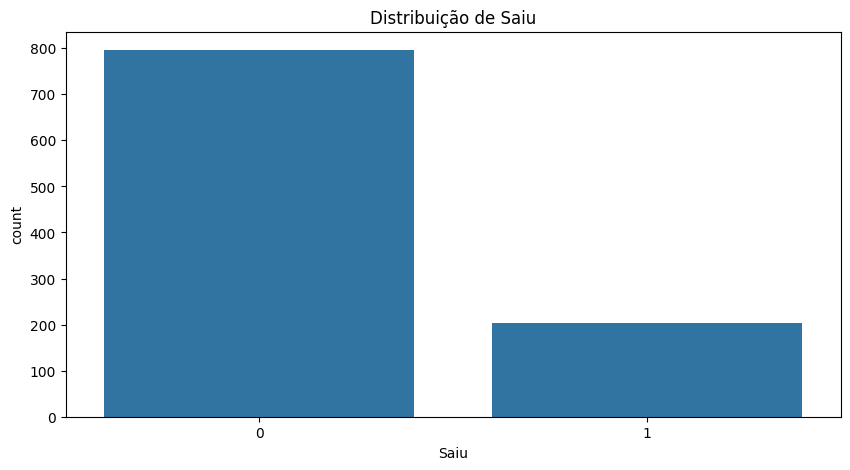

In [257]:
# Analisar a distribuição das variáveis categóricas
categoric = ['Estado','Genero','Patrimônio','Idade','Produtos','PossuiCred','Ativo','Saiu']

for column in categoric:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=data[column])
  plt.title(f"Distribuição de {column}")
  plt.show()

# Podemos verificar que Estado, Gênero e Idade possuem valores estranhos, então iremos individualmente verificar seus outliers

<Axes: xlabel='Estado'>

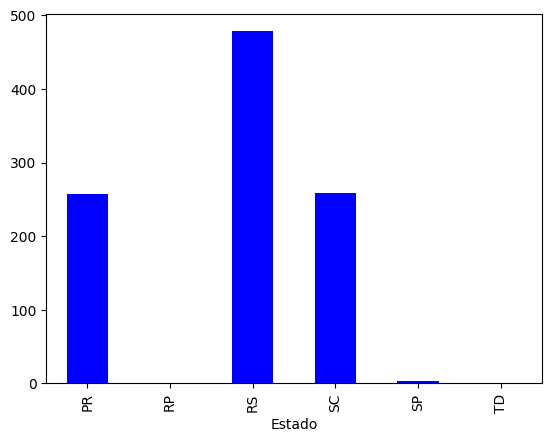

In [258]:
estado = data.groupby(['Estado']).size()
estado.plot.bar(color='blue')
# Podemos verificar que os estado RP e TD estão errados e SP está fora do domínio

<Axes: xlabel='Genero'>

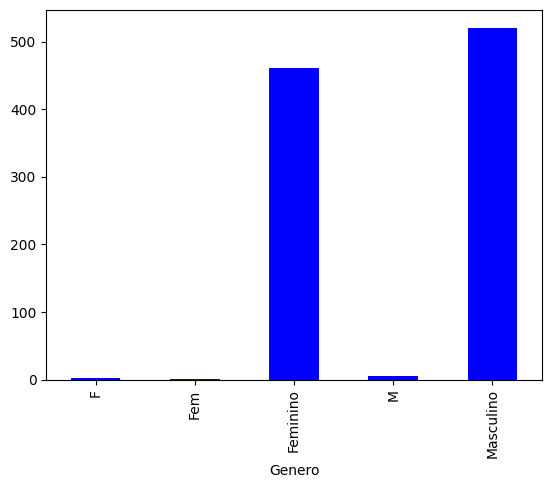

In [259]:
genero = data.groupby(['Genero']).size()
genero.plot.bar(color='blue')
# Como temos várias maneiras de dizer F e M, iremos juntar todas em uma só


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

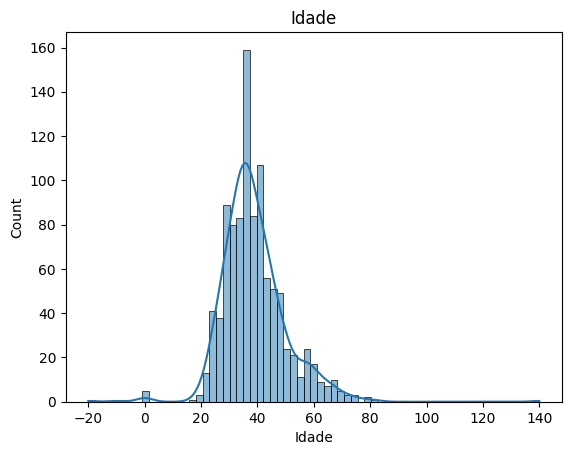

In [260]:
sns.histplot(data['Idade'], kde=True).set_title('Idade')
data['Idade'].describe()
# Podemos ver que existem idades negativas, e muito maiores que um ser humano normal. teremos que substitui-las no intervalo 18 - 90 anos

In [261]:
data.isnull().sum()
# Verificamos que alguns dados são Nulos

Id            0
Score         0
Estado        0
Genero        8
Idade         0
Patrimônio    0
Saldo         0
Produtos      0
PossuiCred    0
Ativo         0
Salario       7
Saiu          0
dtype: int64

In [262]:
data[data.duplicated(['Id'],keep=False)]
# Verificamos que existe somente uma linha duplicada

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


# TRATAMENTO DE DADOS

Vamos começar o tratamento de dados. Recapitulando, temos os seguintes erros:
- dados que não foram preenchidos (Genero e Salario)
- valores de salário muito fora do padrão
- estados inexistentes (TD,RP) e fora do domínio (SP)
- gêneros com mais de um nome
- idades fora do limite 18 a 90 anos
- dados duplicados

In [263]:
# Quando tratamos dados numéricos não preenchidos, substituimos os valores Null pela média dos valores restantes da coluna tratada

mediana = sts.median(data['Salario'])
data['Salario'].fillna(mediana,inplace=True)
data['Salario'].isnull().sum()# verificamos que não existem mais valores nulos na coluna Salário

0

In [264]:
# Tratando de dados não numéricos, podemos substiuir os valores Null pela moda do resto dos valores

moda = sts.mode(data['Genero'])
data['Genero'].fillna(moda,inplace=True)
data['Genero'].isnull().sum()# verificamos que não existem mais valores nulos na coluna Salário

0

In [265]:
data.isnull().sum()
# Agora não exitem dados Nulos no nosso dataset


Id            0
Score         0
Estado        0
Genero        0
Idade         0
Patrimônio    0
Saldo         0
Produtos      0
PossuiCred    0
Ativo         0
Salario       0
Saiu          0
dtype: int64

In [266]:
mediana = sts.median(data['Salario'])
data.loc[data['Salario'] >= 2 * desvio, 'Salario'] = mediana
# trocamos todos os salários muito fora do nosso padrão pela mediana dos salários


<Axes: xlabel='Estado'>

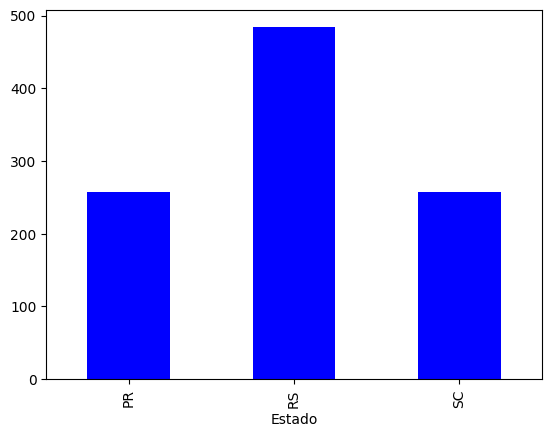

In [267]:
#Agora vamos trocar o valor dos estados inexistentes (TD,RP) e fora do domínio (SP) pela moda dos estados restantes

moda = sts.mode(data['Estado'])
data.loc[data['Estado'].isin(['TD','RP','SP']), 'Estado'] = moda
estado = data.groupby(['Estado']).size()
estado.plot.bar(color='blue')

<Axes: xlabel='Genero'>

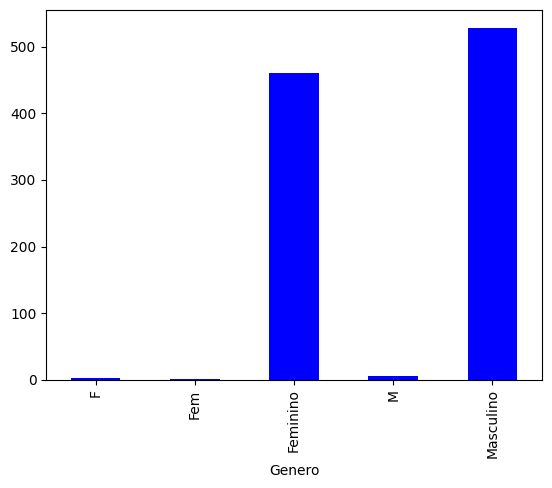

In [268]:
#Agora vamos trocar o fazer um merge dos generos (F,M) em uma categoria só

estado = data.groupby(['Genero']).size()
data.loc[data['Genero'] == 'Masculino', 'Genero'] = 'M'
data.loc[data['Genero'].isin(['Feminino','Fem']), 'Genero'] = 'F'
estado.plot.bar(color='blue')

count    999.000000
mean      39.089089
std       10.310270
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

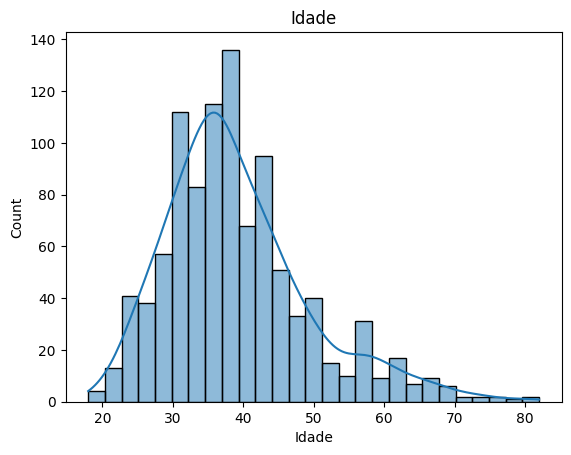

In [269]:
# Para as idades fora do limite 18 a 90 anos, iremos substituir esses valores pela mediana. Mas primeiro, vamos verificar a menor e maior idade

mediana = sts.median(data['Idade'])
data.loc[(data['Idade'] < 18) | (data['Idade'] > 90)] = mediana
sns.histplot(data['Idade'], kde=True).set_title('Idade')
data['Idade'].describe() # aqui verificamos que foram removidas todas idades menores que 18 e maiores que 90

In [270]:
# Por fim, iremos apagar os dados duplicados

data.drop_duplicates(subset='Id',keep='first',inplace=True)
data[data.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu


# MODELOS DE MACHINE LEARNING (LOGISTIC REGRESSION E RANDOM FOREST)

Usaremos modelos de Machine Learning de Regressão Logística, Decision Tree, Random Forest, e KNN  para predizer se o usuário irá sair de um grupo num período específico, levando em conta seus dados com mais influencia

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [272]:
# Primeiro, iremos selecionar as features mais relevantes ao nosso problema.
data.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
0,1,619,RS,F,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,F,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,F,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,F,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,F,43,2,12551082,1,1,1,790841.0,0


In [273]:
# Agora, para um cálculo mais preciso, iremos transformar as features categóricas em numéricas

data['Genero'] = data['Genero'].astype('category') 
data['Genero'] = data['Genero'].cat.codes # F = 0, M =1

data['Estado'] = data['Estado'].astype('category')
data['Estado'] = data['Estado'].cat.codes # PR = 0, RS = 1, SC = 2

data.head()


,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
0,1,619,1,0,42,2,0,1,1,1,10134888.0,1
1,2,608,2,0,41,1,8380786,1,0,1,11254258.0,0
2,3,502,1,0,42,8,1596608,3,1,0,11393157.0,1
3,4,699,1,0,39,1,0,2,0,0,9382663.0,0
4,5,850,2,0,43,2,12551082,1,1,1,790841.0,0


In [274]:
# Normalizaremos todas as features numéricas relevantes

numeric = ['Score','Idade','Patrimônio','Saldo','Produtos','Salario']

scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])
data.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,PossuiCred,Ativo,Salario,Saiu
0,1,-0.299883,1,0,0.279151,-1.054804,-1.131834,-0.914111,1,1,0.217878,1
1,2,-0.411563,2,0,0.182522,-1.396846,0.195811,-0.914111,0,1,0.402367,0
2,3,-1.487746,1,0,0.279151,0.997451,-0.878907,2.566543,1,0,0.425260,1
3,4,0.512330,1,0,-0.010737,-1.396846,-1.131834,0.826216,0,0,0.093900,0
4,5,2.045384,2,0,0.375780,-1.054804,0.856449,-0.914111,1,1,-1.322160,0


Vamos escolher aqui os melhores parâmetros para cada um dos nossos 4 modelos

In [275]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import precision_score


y = data.Saiu
x = data.drop(['Id','Saiu'], axis=1) # Alvo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #Dividiremos Dataset em: 25% teste, 75% treino

smote = SMOTE(random_state=42) #Usaremos Oversampling
x_train, y_train = smote.fit_resample(x_train, y_train) 

#Numero de features a serem testadas
n_features_list = [5, 7, 9]
#Como não temos tantas features, podemos fazer um loop testando com algumas, mas se existissem mais, usaríamos o parâmetro 'auto' 
#em n_features_to_select no nosso SequentialFeatureSelector



classifiers = { # Todos modelos de classificação
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNN()
}

parameters = { # Parâmetros para cada um dos modelos
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(1, 21).tolist()[0::2],
        'min_samples_split': np.arange(2, 11).tolist()[0::2],
        'max_leaf_nodes': np.arange(3, 26).tolist()[0::2],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-4, 4, 10),
        'solver': ['saga', 'liblinear'],
        'max_iter': [100, 200, 500],
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30],
        'min_samples_split': np.arange(2, 10).tolist()[0::2],
        'random_state': [41,42,43]
    },
    'KNeighborsClassifier': {
        'n_neighbors': np.arange(3, 11),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    }
}






Melhor acurácia para DecisionTreeClassifier é 0.8508064516129032 com 9 features
Melhor AUC ROC score para DecisionTreeClassifier é 0.7366666666666668 com 5 features
Precisão para DecisionTreeClassifier é 0.7639330741133499 com 9 features
Melhores parâmetros para DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 17, 'min_samples_split': 2}

Melhor acurácia para LogisticRegression é 0.7741935483870968 com 5 features
Melhor AUC ROC score para LogisticRegression é 0.7491666666666668 com 5 features
Precisão para LogisticRegression é 0.6829865361077111 com 5 features
Melhores parâmetros para LogisticRegression: {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

Melhor acurácia para RandomForestClassifier é 0.8508064516129032 com 9 features
Melhor AUC ROC score para RandomForestClassifier é 0.7729166666666668 com 9 features
Precisão para RandomForestClassifier é 0.7607743605056235 com 9 features
Melhores parâmetros para RandomForestC

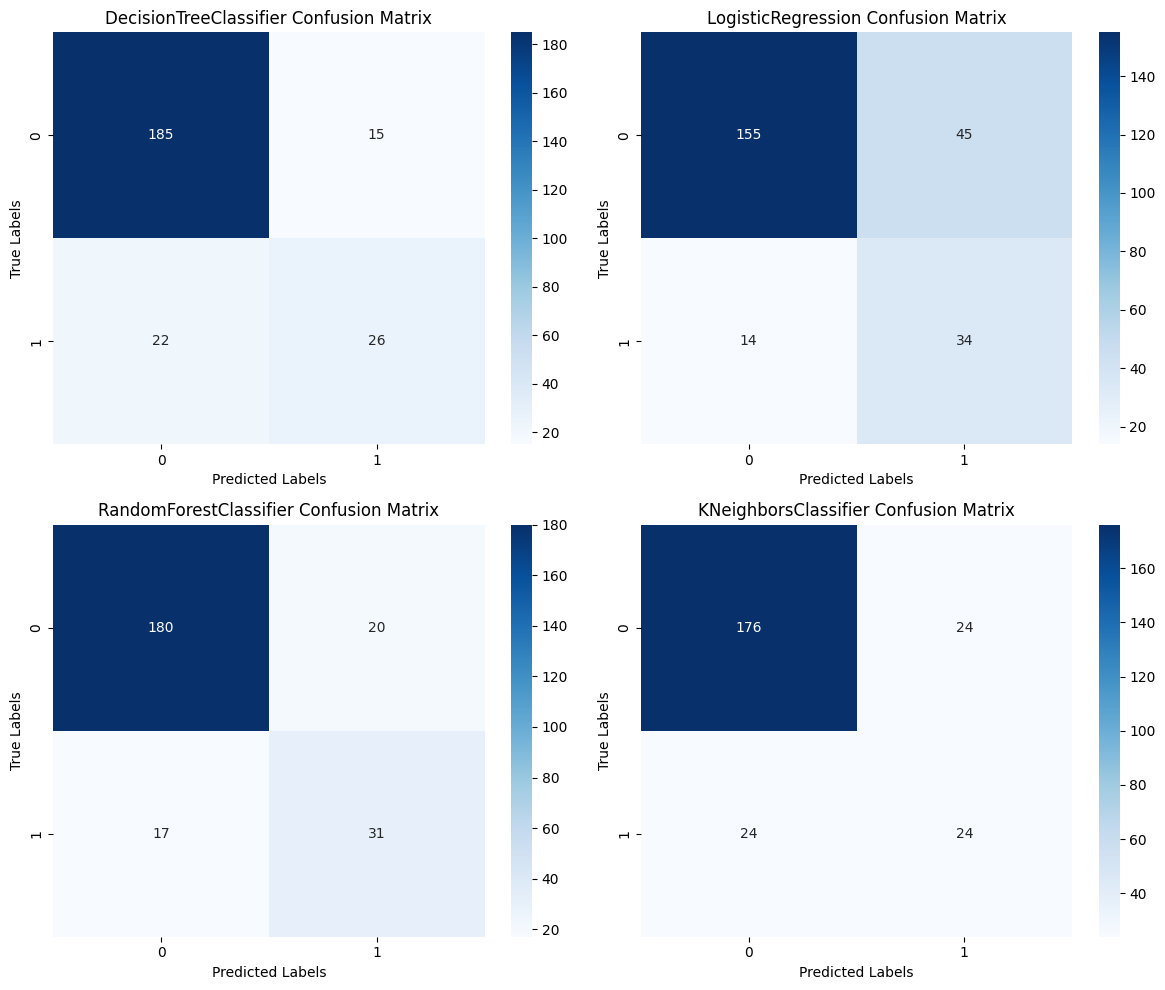

In [276]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten axes for easier indexing
index = 0  # To keep track of subplot index

#Aqui iremos selecionar as melhores features e parâmetros, tanto quando fazer uma confusion matrix para cada modelo
for model_name, model in classifiers.items():

    #GridSearch com todos os parametros de cada modelo  
    model_params = GridSearchCV(model, parameters[model_name], cv=5, n_jobs=-1) 
    model_params.fit(x_train,y_train) 

    #Selecionando os melhores parâmetros de cada modelo
    param = model_params.best_params_ #Melhores parâmetros
    model = model.set_params(**param) #modelo com melhores parametros

    acc_max, auc_max, prec_max = 0, 0, 0 
    
    #Selecionando as melhores features de cada modelo
    for n_features in n_features_list:
    
        features = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='forward') # selecionando as melhores features
        features.fit(x_train,y_train) #Fit
        selected_features = features.get_support(indices=True)
        
        x_train_feat = x_train.iloc[:, selected_features] #selecionando as features em x_train
        x_test_feat = x_test.iloc[:, selected_features] #selecionando as features em x_test
        model.fit(x_train_feat,y_train) #Fit

        #Predizendo acurácia e AUC ROC
        y_pred = model.predict(x_test_feat)
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro')

        #Vendo o s melhores scores e o melhor modelo
        if acc > acc_max:  
            acc_max = acc
            best_n_acc = n_features
        if auc > auc_max: 
            auc_max = auc
            best_n_auc = n_features
        if prec > prec_max: 
            prec_max = prec
            best_n_prec = n_features
            

    print(f'Melhor acurácia para {model_name} é {acc_max} com {best_n_acc} features')
    print(f'Melhor AUC ROC score para {model_name} é {auc_max} com {best_n_auc} features')
    print(f'Precisão para {model_name} é {prec_max} com {best_n_prec} features')
    print(f"Melhores parâmetros para {model_name}: {param}\n")



    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[index], cmap='Blues')
    axes[index].set_title(f'{model_name} Confusion Matrix')
    axes[index].set_xlabel('Predicted Labels')
    axes[index].set_ylabel('True Labels')
    index += 1  # Move to the next subplot

plt.tight_layout()
plt.show()    
    

#printar valores de acc auc e prec pra MELHOR PARAMETRO PARA CADA QNTD DE FEATURES - TERIA QUE PRINTAR 3 VEZES, PARA VER QUAL SE SAI MELHOR
#DEPOIS, RODAR COM PARAMETROS E FEATURES SELECIONADAS DEPOIS


# Melhor acurácia para RandomForestClassifier é 0.8508064516129032 com 9 features
# Melhor AUC ROC score para RandomForestClassifier é 0.7729166666666668 com 9 features
# Precisão para RandomForestClassifier é 0.7607743605056235 com 9 features
# Melhores parâmetros para RandomForestClassifier: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 43}


Se quisermos priorizar Falsos Positivos (Ex: ), usaremos Decision Tree, com os parâmetros {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 17, 'min_samples_split': 2}

Se quisermos priorizar Verdadeiros Positivos (Ex: ), usaremos Logistic Regression, com os parâmetros {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

Se quisermos uma acurácia alta, e uma boa distribuição entre Falsos e Verdadeiros Positivos, usaremos RandomForestClassifier, com os 
parâmetros {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

para esse exemplo, usaremos RandomForestClassifier com 9 features

 ### RandomForestClassifier 

In [277]:
#Temos o modelo 
model = RandomForestClassifier(criterion = 'gini', max_depth = 20, min_samples_split = 2, n_estimators = 50, random_state=42)
model = model.fit(x_train,y_train)

features = SequentialFeatureSelector(model, n_features_to_select=9, direction='forward') # selecionando as melhores features
features.fit(x_train,y_train) #Fit
selected_features = features.get_support(indices=True)

x_train_feat = x_train.iloc[:, selected_features] #selecionando as features em x_train
x_test_feat = x_test.iloc[:, selected_features] #selecionando as features em x_test
model.fit(x_train_feat,y_train) #Fit

y_pred = model.predict(x_test_feat)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')



print(f"Acurácia: {acc}")
print(f"AUC ROC: {auc}")
print(f"Precisão: {prec}")



# Melhor acurácia para RandomForestClassifier é 0.8629032258064516 com 9 features
# Melhor AUC ROC score para RandomForestClassifier é 0.7725000000000001 com 9 features
# Precisão para RandomForestClassifier é 0.7815325010761947 com 9 features
# Melhores parâmetros para RandomForestClassifier: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}

# Acurácia: 0.8508064516129032
# AUC ROC: 0.7254166666666666
# Precisão: 0.7654888970678444

# Acurácia: 0.842741935483871
# AUC ROC: 0.7125000000000001
# Precisão: 0.7502760397497239


# Acurácia: 0.8508064516129032
# AUC ROC: 0.7333333333333333
# Precisão: 0.7639330741133499


Acurácia: 0.8548387096774194
AUC ROC: 0.7675
Precisão: 0.7675000000000001


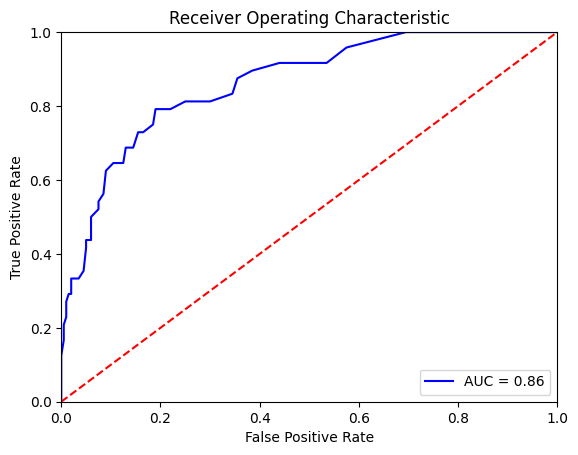

array([ inf, 0.98, 0.94, 0.9 , 0.88, 0.84, 0.82, 0.8 , 0.78, 0.76, 0.74,
       0.72, 0.7 , 0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54, 0.52,
       0.5 , 0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28,
       0.26, 0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.06, 0.04,
       0.02, 0.  ])